<a href="https://colab.research.google.com/github/Sylvie-sql/Sylvie/blob/master/PROJET_FINAL_PYTHON_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import

In [ ]:
# Importer des csv depuis Github
# -*- coding: utf-8 -*-
"""PROJET FINAL PYTHON RFM

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1d0raqIc4z4ICvEgEiFcm3rGPIcUSChHU
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import ace_tools as tools

# ✅ Modifier base_url pour utiliser l'URL sous la forme "raw.githubusercontent.com"
base_url = "https://raw.githubusercontent.com/Sylvie-sql/Sylvie/master/"

# Liste des fichiers CSV (attention à la casse)
files = ["CUSTOMER.csv", "CUSTOMER_ADDITIONAL.csv", "STORE.csv",
         "REFERENTIAL.csv", "RECEIPTS.csv", "PRODUCTS.csv"]

# Lire les fichiers CSV dans des DataFrames
dfs = {file: pd.read_csv(base_url + file) for file in files}

# Afficher les 5 premières lignes de chaque DataFrame
for name, df in dfs.items():
    print(f"🔹 Jeu de données {name} :")
    print(df.head(), "\n")

print(dfs.keys()) # Afficher toutes les clés du dictionnaire

<ipython-input-50-8ea5dba13c1a>:25: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = {file: pd.read_csv(base_url + file) for file in files}


🔹 Jeu de données CUSTOMER.csv :
   ID_INDIVIDU  ID_FOYER  CIVILITE  SEXE  PROFESSION  CATEGORIE_PROF  \
0            4    175898         0     0         NaN             NaN   
1           27         0         3     2         NaN             3.0   
2           34    127060         3     2         NaN             6.0   
3           37         0         2     2         NaN             3.0   
4           47         0         3     2         NaN             NaN   

   DATE_NAISS_A  DATE_NAISS_M  DATE_NAISS_J DATE_CREATION_CARTE  
0           NaN           NaN           NaN          01/01/1989  
1        1967.0           9.0           1.0          08/08/2007  
2        1953.0           3.0           4.0          27/07/2007  
3        1964.0           8.0          21.0          11/07/2007  
4        1972.0           3.0          31.0          23/04/2008   

🔹 Jeu de données CUSTOMER_ADDITIONAL.csv :
   ID_INDIVIDU  CODE_MAGASIN PAYS ETAT  TAILLE  TAILLE_SG TAILLE_BONNET
0            4        

# Partie 1 : Compréhension des données

In [ ]:
# @title
# ---------------------------
# **Partie 1 : Compréhension des données
# ---------------------------

# **💡 Étape 1 : Création de CUSTOMERS_INFO
# **💡 Étape 1.1 : Fusion des données clients
# - Jointure entre CUSTOMER et CUSTOMER_ADDITIONAL sur ID_INDIVIDU
# - On utilise une jointure **gauche (left join)** pour conserver tous les clients
customers_info = dfs["CUSTOMER.csv"].merge(dfs["CUSTOMER_ADDITIONAL.csv"],
                                       on="ID_INDIVIDU",
                                       how="left")

# ✅ Renommer la colonne "CODE_MAGASIN" pour éviter toute confusion
customers_info.rename(columns={"CODE_MAGASIN": "MANAGING_STORE"}, inplace=True)

# ✅ Afficher les 5 premières lignes pour vérifier la fusion
print("\n🔹 CUSTOMERS_INFO (fusion de CUSTOMER et CUSTOMER_ADDITIONAL):")
print(customers_info.head())

# **💡 Étape 2 : Création de RECEIPTS_INFO
# **💡 Étape 2.1 : Convertir le type de EAN en raison d'un problème, pour le transformer en String)
dfs["RECEIPTS.csv"]["EAN"] = dfs["RECEIPTS.csv"]["EAN"].astype(str)
dfs["REFERENTIAL.csv"]["EAN"] = dfs["REFERENTIAL.csv"]["EAN"].astype(str)
# **💡 Étape 2.2 : Fusion de RECEIPTS et REFERENTIAL on PK "EAN"
receipts_info = dfs["RECEIPTS.csv"].merge(dfs["REFERENTIAL.csv"],
                                          on="EAN",
                                          how="left")
# **💡 Étape 2.3 : Fusion avec PRODUCTS
# ✅ Garde que MODELE,Ligne et Famille
products_filtered = dfs["PRODUCTS.csv"][["MODELE", "Ligne", "Famille"]]
# ✅ Fusion RECEIPTS_INFO 和 PRODUCTS
receipts_info = receipts_info.merge(products_filtered,
                                    on="MODELE",
                                    how="left")

# **💡 Étape 2.4 : Fusion avec STORES
# ✅ Garde que CODE_BOUTIQUE, `REGIONS`, `CENTRE_VILLE`, `TYPE_MAGASIN`, `REGIONS_COMMERCIAL`
store_filtered = dfs["STORE.csv"][["CODE_BOUTIQUE", "REGIONS", "CENTRE_VILLE", "TYPE_MAGASIN", "REGIONS_COMMERCIAL"]]
# ✅ Fusion RECEIPTS_INFO et STORE
receipts_info = receipts_info.merge(store_filtered,
                                    on="CODE_BOUTIQUE",
                                    how="left")

# ✅ Afficher les 5 premières lignes pour vérifier la fusion
print("\n🔹 RECEIPTS_INFO (fusion complète):")
print(receipts_info.head())

# ✅ Afficher RECEIPTS_INFO dim
print("\n🔹 RECEIPTS_INFO dim (rows, colomns):", receipts_info.shape)
# ✅ Afficher CUSTOMERS_INFO dim
print("\n🔹 CUSTOMERS_INFO dim (rows, colomns):", customers_info.shape)

# **💡 Étape 3 : Comprehension des colonnes
# ✅ Data verification : Sélectionnez toutes les informations relatives aux tickets de caisse du client 174591
client_id = 174591
client_receipts = receipts_info[receipts_info["ID_INDIVIDU"] == client_id]
print("\n🔹 client_receipts dim (rows, colomns):", client_receipts.shape)
print("\n🔹 Client 174591 number of unique tickets:", client_receipts["NUM_TICKET"].nunique())

client_receipts

# **💡 Étape 3.1 :
# A partir des 2 bases de données précédemment constituées, étudier les variables suivantes dans RECEIPTS_INFO :
# • Analyser ensemble `REGIONS` et `REGIONS_COMMERCIAL`. Les 2 colonnes sont pareil
if receipts_info["REGIONS"].equals(receipts_info["REGIONS_COMMERCIAL"]):
    print("Les 2 colonnes sont pareil, supprime REGIONS_COMMERCIAL")
    receipts_info.drop(columns=["REGIONS_COMMERCIAL"], inplace=True)
else:
    print("Les 2 colonnes sont PAS pareil, garde les 2")
# tools.display_dataframe_to_user(name="Regions Comparison", dataframe=regions_comparison)

# • Analyser `CENTRE_VILLE`. Y a-t-il une modalité qui peut être modifiée ?
print("\n🔹 `CENTRE_VILLE` unique values:")
print(receipts_info["CENTRE_VILLE"].value_counts())

# • Analysez ensemble `Ligne` et `Famille` juste pour avoir une idée de la hiérarchie du produit. Il ne devrait pas y avoir de modification à faire.
print("\n🔹 `Ligne` and `Famille` relations:")
print(receipts_info[["Ligne", "Famille"]].drop_duplicates().head())

# • Analyser `CODE_LIGNE` et `TYPE_LIGNE`. Ces colonnes sont-elles utiles ?
print("\n🔹 `CODE_LIGNE` 和 `TYPE_LIGNE` 的唯一值组合:")
print(receipts_info[["CODE_LIGNE", "TYPE_LIGNE"]].drop_duplicates())

# • Avec un peu d'analyse sur PRIX_AP_REMISE, REMISE_VALEUR, REMISE (à faire!), nous supposons que :
# PRIX_AP_REMISE est le prix payé après les remises potentielles, REMISE_VALEUR semble plus utile que REMISE,
# REMISE_VALEUR est la remise représentée en % (entre 0 et 100 avec quelques anomalies).
# • Il faut alors supprimer la colonne REMISE, remplacer les valeurs de REMISE_VALEUR par 100 si les valeurs sont > 100
if "REMISE" in receipts_info.columns:
    receipts_info.drop(columns=["REMISE"], inplace=True)
    print("\n✅ `REMISE` column deleted")

if "REMISE_VALEUR" in receipts_info.columns:
    receipts_info["REMISE_VALEUR"] = receipts_info["REMISE_VALEUR"].apply(lambda x: min(x, 100))
    print("\n✅ Replace `REMISE_VALEUR` (>100) to 100")

print("\n🔹 Cleaned RECEIPTS_INFO :")
print(client_receipts.head())

# **💡 Étape 3.2 : Créer des colonnes
# ✅ Création de nouvelles variables dans `receipts_info`
receipts_info["PLV"] = receipts_info["MODELE"].apply(lambda x: 1 if x == "PLV" else 0)

receipts_info["Gift"] = receipts_info.apply(
    lambda row: 1 if row["MODELE"] in ["FAVO", "FAVORI"] and row["PRIX_AP_REMISE"] == 0 else 0,
    axis=1
)

receipts_info["Entry-level"] = receipts_info["MODELE"].apply(lambda x: 1 if x == "ACCESS" else 0)

# # ✅ Affichage des premières lignes des nouvelles colonnes ajoutées
# import ace_tools as tools # Make sure ace_tools is imported after installation
# tools.display_dataframe_to_user(name="Receipts Info with New Variables", dataframe=receipts_info)


🔹 CUSTOMERS_INFO (fusion de CUSTOMER et CUSTOMER_ADDITIONAL):
   ID_INDIVIDU  ID_FOYER  CIVILITE  SEXE  PROFESSION  CATEGORIE_PROF  \
0            4    175898         0     0         NaN             NaN   
1           27         0         3     2         NaN             3.0   
2           34    127060         3     2         NaN             6.0   
3           37         0         2     2         NaN             3.0   
4           47         0         3     2         NaN             NaN   

   DATE_NAISS_A  DATE_NAISS_M  DATE_NAISS_J DATE_CREATION_CARTE  \
0           NaN           NaN           NaN          01/01/1989   
1        1967.0           9.0           1.0          08/08/2007   
2        1953.0           3.0           4.0          27/07/2007   
3        1964.0           8.0          21.0          11/07/2007   
4        1972.0           3.0          31.0          23/04/2008   

   MANAGING_STORE PAYS ETAT  TAILLE  TAILLE_SG TAILLE_BONNET  
0             751   FR    N    38.0   

# Partie 2 : Préparation des données

In [ ]:
# ---------------------------
# **Partie 2 : Préparation des données
# ---------------------------
# **💡 Étape 1 : Filtrer sur les 12 derniers mois disponibles
receipts_info["DATE_ACHAT"]

# ✅ Commencez par vérifier le type de données
print("Type de données après la conversion:", receipts_info["DATE_ACHAT"].dtype)

# ✅ Enlevez les guillemets
receipts_info["DATE_ACHAT"] = receipts_info["DATE_ACHAT"].astype(str).str.strip()
receipts_info["DATE_ACHAT"] = receipts_info["DATE_ACHAT"].str.replace('"', '')  # Enlever les guillemets

# ✅ Utilisez `dayfirst=True` pour forcer l'analyse
receipts_info["DATE_ACHAT"] = pd.to_datetime(receipts_info["DATE_ACHAT"], dayfirst=True, errors='coerce')

# ✅ Vérifiez si la conversion a réussi
print("Type de données après la conversion:", receipts_info["DATE_ACHAT"].dtype)
print(receipts_info["DATE_ACHAT"].head())

# ✅ Calculer le prix final d'un achat
receipts_info["VISIT_VALUE"] = receipts_info["PRIX_AP_REMISE"] * receipts_info["QUANTITE"]

print("✅ Le calcul du prix final est terminé !")

# ✅ Obtenez la dernière date et filtrez les données des 12 derniers mois
# latest_date
# Timestamp('2016-08-31 00:00:00') TRES IMPORTANT !!!
latest_date = receipts_info["DATE_ACHAT"].max()
start_date = latest_date - pd.DateOffset(months=12) # Timestamp('2015-08-31 00:00:00')
receipts_filtered = receipts_info[(receipts_info["DATE_ACHAT"] >= start_date) & (receipts_info["DATE_ACHAT"] <= latest_date)]
# [119434 rows x 29 columns]
print("✅ 已筛选最近12个月的数据！")

receipts_filtered

# **💡 Étape 2 : Calculer “M” la valeur monétaire par visite et le prix moyen, pour chaque visite (identifier correctement 1 visite)
# ✅ Déterminer une visite unique
visit_cols = ["ID_INDIVIDU", "CODE_BOUTIQUE", "DATE_ACHAT", "NUM_TICKET"]
visits = receipts_filtered.groupby(visit_cols).agg(
    NB_PRODUCTS=("QUANTITE", "sum"),  # le nombre de produits vendus, NB_PRODUCTS
    VISIT_VALUE=("VISIT_VALUE", "sum"),  # a valeur monétaire (somme des prix des produits)
).reset_index()

# ✅ Calculer le prix moyen par visite
visits["AVG_PRICE"] = visits["VISIT_VALUE"] / visits["NB_PRODUCTS"]

print("✅ 计算每次访问的财务指标完成！") # [30974 rows x 7 columns] ID_INDIVIDU  CODE_BOUTIQUE DATE_ACHAT  NUM_TICKET  NB_PRODUCTS  VISIT_VALUE  AVG_PRICE

# **💡 Étape 3 : Calculer “F” la FRÉQUENCE par individu (à partir du tableau précédent par visite)
# ✅ Calculer la fréquence par individu
frequency = visits.groupby("ID_INDIVIDU").agg(
    NB_VISITS=("NUM_TICKET", "count"),  # le nombre de visites
    CUMUL_VALUE=("VISIT_VALUE", "sum"),  # la somme de la valeur monétaire par visite (en utilisant VISIT_VALUE calculée précédemment)
    AVG_VISIT_VALUE=("VISIT_VALUE", "mean"),  # moyenne de la valeur monétaire par visite (à l'aide de VISIT_VALUE calculée)
    AVG_NB_PRODUCTS_VISIT=("NB_PRODUCTS", "mean"),  # moyenne des quantités (en utilisant NB_PRODUCTS calculé auparavant)
).reset_index()

print("✅ 计算用户访问频率完成！") # [12460 rows x 5 columns] ID_INDIVIDU  NB_VISITS  CUMUL_VALUE  AVG_VISIT_VALUE  AVG_NB_PRODUCTS_VISIT

# **💡 Étape 4 : Calculer “R” la RECENCE par individu (à partir de la table précédente par visite) ????

# ✅ Calculer la dernière date d'achat pour chaque individu
recence = receipts_filtered.groupby("ID_INDIVIDU").agg(
    LAST_PURCHASE_DATE=("DATE_ACHAT", "max"),
    NB_STORES=("CODE_BOUTIQUE", "nunique"),    # nombre de stores unique
    NB_LIGNES=("Ligne", "nunique"),            # nombre de Ligne
    NB_FAMILLES=("Famille", "nunique"),        # nombre de Famille
    NB_GIFTS=("Gift", "sum")                   # nombre de Gift
).reset_index()

# ✅ 处理 NB_GIFTS 缺失值（如果没有礼物，设为 0）
recence["NB_GIFTS"] = recence["NB_GIFTS"].fillna(0).astype(int)

# ✅ 显示 `recence` 结果
print("✅ `recence` finished ：")
print(recence.head()) # [12460 rows x 6 columns]  ID_INDIVIDU LAST_PURCHASE_DATE  NB_STORES  NB_LIGNES  NB_FAMILLES  NB_GIFTS


# **💡 Étape 5 : Part des visites dans le magasin gestionnaire
# ✅ Joindre VISIT_VALUE (en ne gardant que l'ID INDIVIDU et le CODE BOUTIQUE) et les informations sur les clients (en ne
# gardant que l'ID INDIVIDU et le MAGASIN GESTIONNAIRE)
customer_store_info = receipts_filtered[["ID_INDIVIDU", "CODE_BOUTIQUE", "VISIT_VALUE"]].merge(
    customers_info[["ID_INDIVIDU", "MANAGING_STORE"]],
    on="ID_INDIVIDU",
    how="left"
)

# ✅ Créer une colonne pour identifier si l'achat est dans le magasin gestionnaire
customer_store_info["IS_MANAGING_STORE"] = (
    customer_store_info["MANAGING_STORE"] == customer_store_info["CODE_BOUTIQUE"]
).astype(int)

# ✅ 计算管理商店的购买比例 (Calculer la part des visites effectuées dans le magasin gestionnaire)
store_purchase_share = customer_store_info.groupby("ID_INDIVIDU").agg(
    NB_VISITS=("IS_MANAGING_STORE", "count"),  # 计算总访问次数
    MANAGING_STORE_VISITS=("IS_MANAGING_STORE", "sum"),  # 计算管理商店的访问次数
    TOTAL_VISIT_VALUE=("VISIT_VALUE", "sum")  # 计算总消费金额
).reset_index()

# ✅ Calculer la part des visites effectuées dans le magasin gestionnaire en %
store_purchase_share["MANAGING_STORE_SHARE"] = store_purchase_share["MANAGING_STORE_VISITS"] / store_purchase_share["NB_VISITS"]

# # ✅ 显示最终数据
# import ace_tools as tools
# tools.display_dataframe_to_user(name="管理商店访问比例", dataframe=store_purchase_share)

print("✅ 计算管理商店购买比例完成！")

store_purchase_share

print(receipts_info.columns)
print(customers_info.columns)


# **💡 Étape 6 : Table CUSTOMERS_INFO - Calcul par individu :
# **💡 Étape 6.1 : Âge (AGE)
# Tout d'abord, trouvez les colonnes de dates qui vous aideront à calculer l'âge (il n'est pas nécessaire de calculer l'âge
# avec une précision de mois ou de jour, l'année suffit, mais vous pouvez la calculer si cela vous intéresse !)
print(customers_info[["DATE_NAISS_A", "DATE_NAISS_M", "DATE_NAISS_J"]].head())

# ✅ 确保年、月、日是整数，并填充缺失值
customers_info["DATE_NAISS_A"] = customers_info["DATE_NAISS_A"].fillna(0).astype(int)
customers_info["DATE_NAISS_M"] = customers_info["DATE_NAISS_M"].fillna(0).astype(int)
customers_info["DATE_NAISS_J"] = customers_info["DATE_NAISS_J"].fillna(0).astype(int)

# ✅ 过滤掉无效日期（年份不能为0）
valid_dates = customers_info["DATE_NAISS_A"] > 0

# ✅ 组合出生日期（格式化月份和日期为两位数）
customers_info.loc[valid_dates, "DATE_NAISSANCE"] = customers_info.loc[valid_dates].apply(
    lambda row: f"{row['DATE_NAISS_A']}-{int(row['DATE_NAISS_M']):02d}-{int(row['DATE_NAISS_J']):02d}",
    axis=1
)

# ✅ 转换为日期格式（指定格式以提高解析成功率）
customers_info["DATE_NAISSANCE"] = pd.to_datetime(customers_info["DATE_NAISSANCE"], format="%Y-%m-%d", errors='coerce')

# ✅ 查看转换后的日期
print(customers_info[["DATE_NAISS_A", "DATE_NAISS_M", "DATE_NAISS_J", "DATE_NAISSANCE"]].head())

# L'âge est-il calculé par rapport à l'année en cours ? Ou une autre année est-elle plus appropriée ? Pensez à la fourchette de dates que nous utilisons actuellement.
# NON ! ! c'est 2016 au lieu de 2025
current_date = pd.to_datetime('2016-08-31')
current_year = 2016
customers_info["AGE"] = current_year - customers_info["DATE_NAISSANCE"].dt.year

# A ce stade, la distribution (que vous aurez visualisée) de l'âge des clients révèle des valeurs aberrantes :
# clients avecun âge négatif (ou inférieur à 18 ans) : créer des valeurs manquantes lorsque l'âge < 15 ou l’âge > 90.
customers_info.loc[(customers_info["AGE"] < 15) | (customers_info["AGE"] > 90), "AGE"] = None
print(customers_info[["AGE"]].describe())

# **💡 Étape 6.2 : Ancienneté
# ✅ Convertir DATE_CREATION_CARTE dans le bon type
customers_info["DATE_CREATION_CARTE"] = pd.to_datetime(customers_info["DATE_CREATION_CARTE"], errors='coerce')

# ✅ Calculer l'ancienneté du client
customers_info["ANCIENNETE"] = current_year - customers_info["DATE_CREATION_CARTE"].dt.year

# ✅ Traiter les valeurs aberrantes
customers_info.loc[customers_info["ANCIENNETE"] > 10, "ANCIENNETE"] = None
customers_info.loc[customers_info["ANCIENNETE"] < 0, "ANCIENNETE"] = 0

# ✅ Créer une table MASTER avec toutes les caractéristiques
master_table = customers_info.copy()
print("✅ ANCIENNETE Calculated ！")
print(master_table[["ID_INDIVIDU", "DATE_CREATION_CARTE", "ANCIENNETE"]].head())

# **💡 Étape 7 : Beaucoup de clients ont des valeurs manquantes concernant les caractéristiques d'achat.
# Vérifiez qu'ils ne sont effectivement pas présents dans la table des reçus depuis le début.
# En effet, ces clients n'ont pas de reçus et nous n'allons donc pas les prendre en compte dans la segmentation RFM.
# Il peut s'agir de prospects, de clients inactifs (dernier achat <1 an) ou de clients très récents (dernier achat >
# 30/11/2016).
# Pour la segmentation RFM, nous excluons les clients inactifs sur l'année d'étude.
# → Remplir les valeurs manquantes avec 0 pour NB_GIFTS
# ✅ 检查 ID_INDIVIDU 数据类型
print(customers_info["ID_INDIVIDU"].dtype)
print(recence["ID_INDIVIDU"].dtype)

# ✅ 如果类型不一致，则统一为字符串（或整数）
customers_info["ID_INDIVIDU"] = customers_info["ID_INDIVIDU"].astype(str)
recence["ID_INDIVIDU"] = recence["ID_INDIVIDU"].astype(str)

# ✅ 重新合并
customers_info = customers_info.merge(recence, on="ID_INDIVIDU", how="right")

# ✅ 确保 `LAST_PURCHASE_DATE` 是 datetime 类型
customers_info["LAST_PURCHASE_DATE"] = pd.to_datetime(customers_info["LAST_PURCHASE_DATE"], errors="coerce")

print(customers_info[["ID_INDIVIDU", "LAST_PURCHASE_DATE"]].head(10))

# ✅ Calculer la recence
customers_info["RECENCY"] = (current_date - customers_info["LAST_PURCHASE_DATE"]).dt.days

# ✅ Classer les clients
customers_info["CLIENT_TYPE"] = "Active"  # Active by default
# 1. never purchased
customers_info.loc[customers_info["LAST_PURCHASE_DATE"].isna(), "CLIENT_TYPE"] = "Prospect"

# 2. Inactive ：last purchase date > 365 days
customers_info.loc[customers_info["RECENCY"] > 365, "CLIENT_TYPE"] = "Inactive"

# 3. 新客户：最近购买时间晚于 2016-11-30 ?? 2016-08-01 !!!!!!!!!!!
customers_info.loc[customers_info["LAST_PURCHASE_DATE"] > "2016-08-01", "CLIENT_TYPE"] = "Recent"

# ✅ Exclure les clients inactifs pour la segmentation RFM
customers_info = customers_info[customers_info["CLIENT_TYPE"] != "Inactive"]
print(customers_info["ID_INDIVIDU"].dtype)

# ✅ fillna
customers_info["NB_GIFTS"] = customers_info["NB_GIFTS"].fillna(0).astype(int)
# [12444 rows x 26 columns]
print("✅ Données bien nettoyées avant éffcutuer RFM analyse ！")
# print(customers_info[["ID_INDIVIDU", "LAST_PURCHASE_DATE", "RECENCY", "CLIENT_TYPE", "NB_GIFTS"]].head())

print("\n🔹 RECEIPTS_INFO - Dimensions (rows, columns):", receipts_info.shape)
print("\n🔹 CUSTOMERS_INFO - Dimensions (rows, columns):", customers_info.shape)

receipts_columns = sorted(receipts_info.columns.tolist())
customers_columns = sorted(customers_info.columns.tolist())

print("\n🔹 RECEIPTS_INFO - Colonnes triées alphabétiquement:")
print(receipts_columns)

print("\n🔹 CUSTOMERS_INFO - Colonnes triées alphabétiquement:")
print(customers_columns)

# ✅ trouver les colonnes communes
common_columns = list(set(receipts_columns) & set(customers_columns))

print("\n✅ Colonnes communes entre RECEIPTS_INFO et CUSTOMERS_INFO:")
print(sorted(common_columns))



Type de données après la conversion: object
Type de données après la conversion: datetime64[ns]
0   2013-12-14
1   2015-12-14
2   2013-12-14
3   2013-12-14
4   2016-07-02
Name: DATE_ACHAT, dtype: datetime64[ns]
✅ Le calcul du prix final est terminé !
✅ 已筛选最近12个月的数据！
✅ 计算每次访问的财务指标完成！
✅ 计算用户访问频率完成！
✅ `recence` finished ：
   ID_INDIVIDU LAST_PURCHASE_DATE  NB_STORES  NB_LIGNES  NB_FAMILLES  NB_GIFTS
0            4         2016-07-23          4          0            0         1
1           91         2016-04-10          1          0            0         0
2           99         2016-05-28          1          0            0         0
3          557         2016-06-27          1          0            0         3
4         1396         2016-07-02          4          1            3         3
✅ 计算管理商店购买比例完成！
Index(['DATE_ACHAT', 'EAN', 'ID_INDIVIDU', 'ID_FOYER', 'CODE_LIGNE',
       'TYPE_LIGNE', 'NUM_TICKET', 'QUANTITE', 'PRIX_AP_REMISE',
       'REMISE_VALEUR', 'CODE_BOUTIQUE', 'ID_ARTICLE', 

<ipython-input-52-9975a6b0ae2d>:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_info["NB_GIFTS"] = customers_info["NB_GIFTS"].fillna(0).astype(int)


# Partie 3 : Construction de la segmentation RFM

  ID_INDIVIDU LAST_PURCHASE_DATE
0           4         2016-07-23
1           4         2016-07-23
2           4         2016-07-23
3           4         2016-07-23
4           4         2016-07-23
  ID_INDIVIDU  RECENCY  NB_VISITS  CUMUL_VALUE
0           4       39          6          475
1           4       39          6          475
2           4       39          6          475
3           4       39          6          475
4           4       39          6          475
  ID_INDIVIDU  RECENCY  NB_VISITS  CUMUL_VALUE  ANCIENNETE DATE_CREATION_CARTE
0           4       39          6          475         NaN          1989-01-01
1          91      143          1          112         NaN                 NaT
2          99       95          3          177         9.0          2007-10-10
3         557       65          6          272         NaN                 NaT
4        1396       60          8          876         NaN                 NaT


<ipython-input-33-fa50d5fb47f6>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_data["CUMUL_VALUE"].fillna(0, inplace=True)
<ipython-input-33-fa50d5fb47f6>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

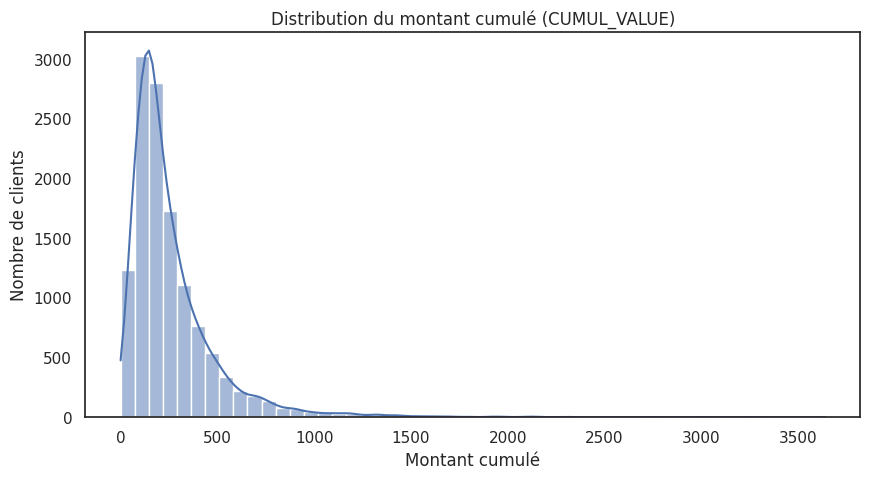


🔹 Nombre de clients avec un montant cumulé de 0 : 104

🔹 Analyse du client : 2976
   ID_INDIVIDU  RECENCY  NB_VISITS  CUMUL_VALUE  ANCIENNETE  \
17        2976      208          1            0         NaN   

   DATE_CREATION_CARTE  IS_NEW_CUSTOMER  
17                 NaT                0  


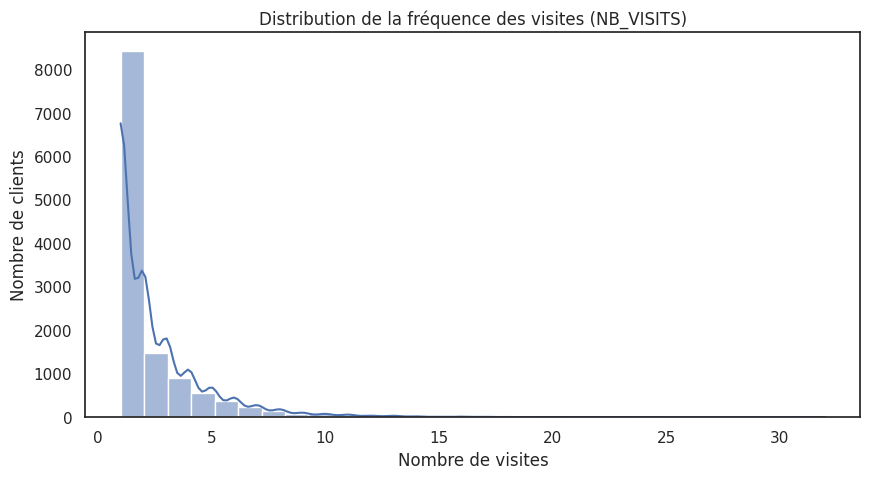

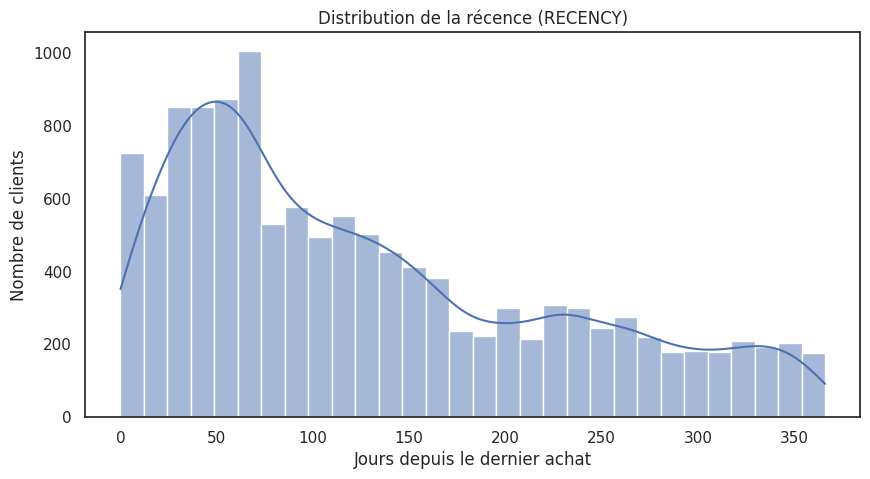


🔹 Aperçu des segments RFM :
  ID_INDIVIDU  R_Score  F_Score  M_Score RFM_Segment       RFM_Category
0           4        3        3        3         333  Très bons clients
1          91        2        1        1         211    Clients faibles
2          99        2        2        2         222       Bons clients
3         557        2        3        3         233  Très bons clients
4        1396        3        3        3         333  Très bons clients


<ipython-input-33-fa50d5fb47f6>:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=rfm_data_final["RFM_Category"], order=rfm_data_final["RFM_Category"].value_counts().index, palette="viridis")


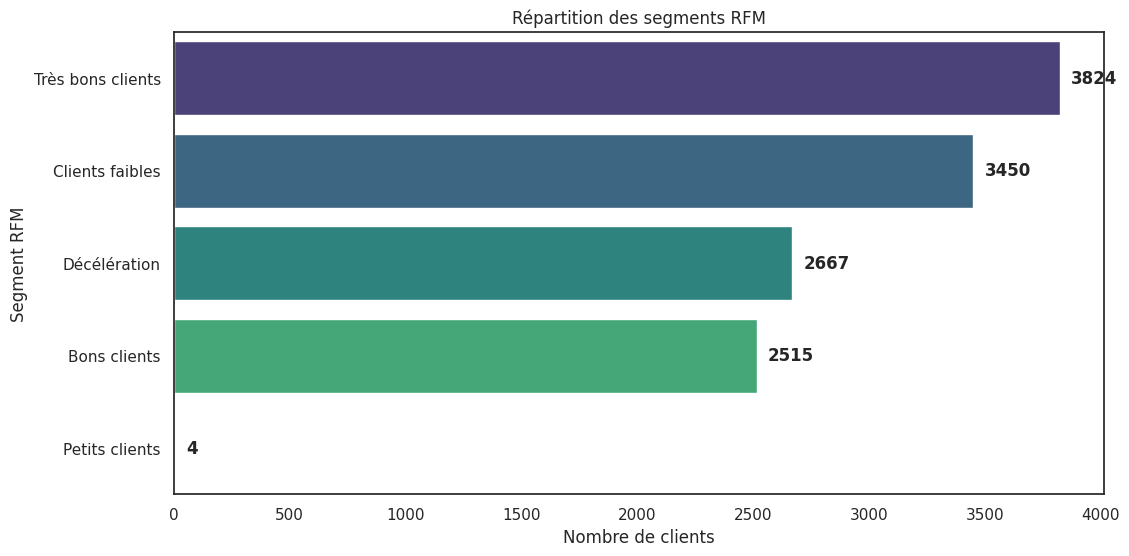

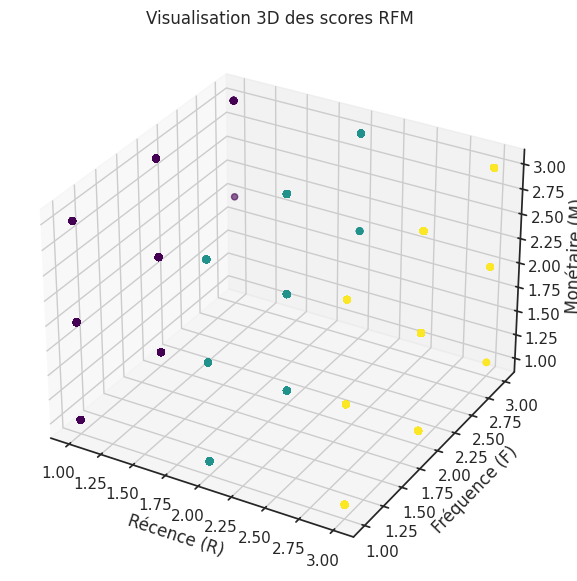

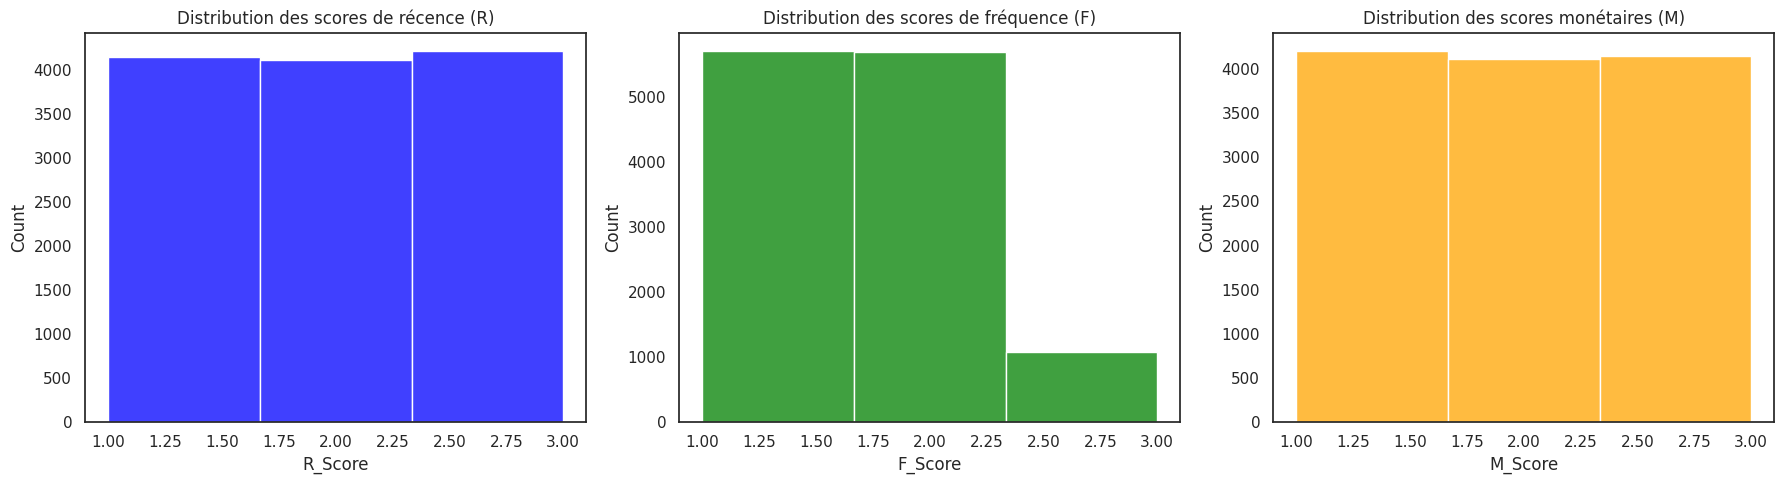

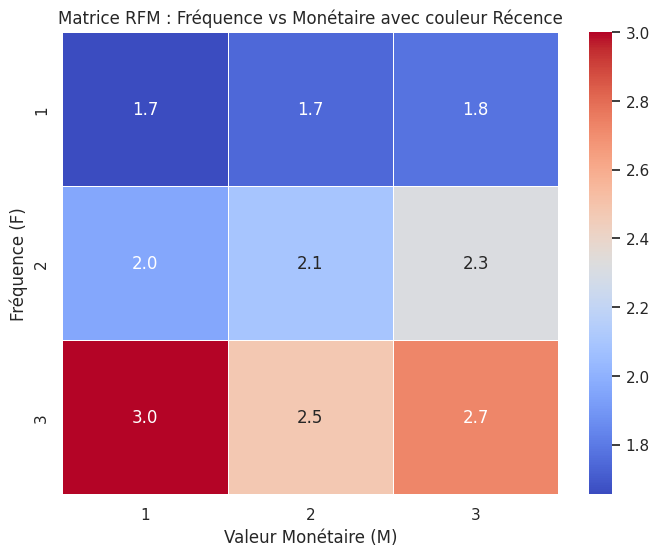

In [ ]:
# ---------------------------
# **Partie 3 : Construction de la segmentation RFM
# ---------------------------
# **💡 Étape 1 :
# customers_info["ID_INDIVIDU"] = customers_info["ID_INDIVIDU"].astype(str)
# receipts_info["ID_INDIVIDU"] = receipts_info["ID_INDIVIDU"].astype(str)

# ✅ `ID_INDIVIDU` type
visits["ID_INDIVIDU"] = visits["ID_INDIVIDU"].astype(str) #### M
frequency["ID_INDIVIDU"] = frequency["ID_INDIVIDU"].astype(str) #### F
recence["ID_INDIVIDU"] = recence["ID_INDIVIDU"].astype(str) #### R

rfm_data = frequency.merge(visits, on="ID_INDIVIDU", how="left")
rfm_data = rfm_data.merge(recence, on="ID_INDIVIDU", how="left")

# ✅ 显示前几行数据，检查是否合并正确
print(rfm_data[["ID_INDIVIDU", "LAST_PURCHASE_DATE"]].head())

# ✅ 处理缺失值（如果没有交易，设为 0）
rfm_data["CUMUL_VALUE"].fillna(0, inplace=True)
rfm_data["NB_VISITS"].fillna(0, inplace=True)

# ✅ 计算 `RECENCY`（最近一次购买到 2016-08-31 的天数）
rfm_data["LAST_PURCHASE_DATE"] = pd.to_datetime(rfm_data["LAST_PURCHASE_DATE"], errors="coerce")
rfm_data["RECENCY"] = (current_date - rfm_data["LAST_PURCHASE_DATE"]).dt.days
rfm_data["RECENCY"].fillna(rfm_data["RECENCY"].max(), inplace=True)

rfm_data_subset = rfm_data[['ID_INDIVIDU', 'RECENCY', 'NB_VISITS', 'CUMUL_VALUE']]
print(rfm_data_subset.head())
rfm_data_unique = rfm_data_subset.drop_duplicates(subset=['ID_INDIVIDU'])
rfm_data_unique

# 选择需要合并的列
customers_info_subset = customers_info[["ID_INDIVIDU", "ANCIENNETE","DATE_CREATION_CARTE"]]

# 确保ID_INDIVIDU数据类型一致
rfm_data_unique["ID_INDIVIDU"] = rfm_data_unique["ID_INDIVIDU"].astype(str)
customers_info_subset["ID_INDIVIDU"] = customers_info_subset["ID_INDIVIDU"].astype(str)

# 执行左连接 (left join)，保留 rfm_data_unique 的所有行
rfm_data_final = rfm_data_unique.merge(customers_info_subset, on="ID_INDIVIDU", how="left")

# 查看合并后的数据
print(rfm_data_final.head())

# ✅ Récence : Rappelez-vous que nous ne prenons en compte qu'un an d'historique d'achat pour les clients.
# Si l'ancienneté est inférieure à 1 an, de quel type de clients s'agit-il ? Nous voulons créer une variable pour les identifier
rfm_data_final["IS_NEW_CUSTOMER"] = (rfm_data_final["ANCIENNETE"] < 1).astype(int)

# **💡 Étape 2 :

# ✅ Analyser la distribution du montant cumulé (CUMUL_VALUE)
plt.figure(figsize=(10, 5))
sns.histplot(rfm_data_final["CUMUL_VALUE"], bins=50, kde=True)
plt.title("Distribution du montant cumulé (CUMUL_VALUE)")
plt.xlabel("Montant cumulé")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Identifier les clients avec une valeur cumulée de 0
clients_zero_value = rfm_data_final[rfm_data_final["CUMUL_VALUE"] == 0]
print("\n🔹 Nombre de clients avec un montant cumulé de 0 :", len(clients_zero_value))

# ✅ Sélectionner un client avec CUMUL_VALUE = 0 pour analyse
if not clients_zero_value.empty:
    client_zero_id = clients_zero_value.iloc[0]["ID_INDIVIDU"]
    print("\n🔹 Analyse du client :", client_zero_id)
    print(rfm_data_final[rfm_data_final["ID_INDIVIDU"] == client_zero_id])

# ✅ Analyser la distribution de la fréquence (NB_VISITS)
plt.figure(figsize=(10, 5))
sns.histplot(rfm_data_final["NB_VISITS"], bins=30, kde=True)
plt.title("Distribution de la fréquence des visites (NB_VISITS)")
plt.xlabel("Nombre de visites")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Analyser la distribution de la récence (RECENCY)
plt.figure(figsize=(10, 5))
sns.histplot(rfm_data_final["RECENCY"], bins=30, kde=True)
plt.title("Distribution de la récence (RECENCY)")
plt.xlabel("Jours depuis le dernier achat")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Définir les seuils pour RFM (Faible / Moyen / Élevé)
rfm_data_final["R_Score"] = pd.qcut(rfm_data_final["RECENCY"], q=3, labels=[3, 2, 1]).astype(int)
# rfm_data_final["F_Score"] = pd.qcut(rfm_data_final["NB_VISITS"], q=3, labels=[1, 2, 3], duplicates="drop").astype(int)
# 由于 qcut() 依赖数据的分位数，而 NB_VISITS 分布高度偏斜，我们改用 pd.cut() 设定手动阈值 ✅ 设定 `NB_VISITS` 的手动分界点
rfm_data_final["F_Score"] = pd.cut(
    rfm_data_final["NB_VISITS"],
    bins=[0, 1, 5, rfm_data_final["NB_VISITS"].max()],  # 你可以调整这些分界点
    labels=[1, 2, 3]
).astype(int)

rfm_data_final["M_Score"] = pd.qcut(rfm_data_final["CUMUL_VALUE"], q=3, labels=[1, 2, 3]).astype(int)


# ✅ Créer une variable combinée pour définir les segments RFM
rfm_data_final["RFM_Segment"] = rfm_data_final["R_Score"].astype(str) + rfm_data_final["F_Score"].astype(str) + rfm_data_final["M_Score"].astype(str)

# ✅ Mapper les segments RFM en catégories commerciales
rfm_mapping = {
    "111": "Clients faibles",
    "112": "Décélération",
    "113": "Bons clients",
    "121": "Décélération",
    "122": "Bons clients",
    "123": "Très bons clients",
    "131": "Petits clients",
    "132": "Bons clients",
    "133": "Très bons clients",
    "211": "Clients faibles",
    "212": "Décélération",
    "213": "Bons clients",
    "221": "Décélération",
    "222": "Bons clients",
    "223": "Très bons clients",
    "231": "Petits clients",
    "232": "Bons clients",
    "233": "Très bons clients",
    "311": "Clients faibles",
    "312": "Décélération",
    "313": "Bons clients",
    "321": "Décélération",
    "322": "Bons clients",
    "323": "Très bons clients",
    "331": "Petits clients",
    "332": "Bons clients",
    "333": "Très bons clients"
}

rfm_data_final["RFM_Category"] = rfm_data_final["RFM_Segment"].map(rfm_mapping)

# ✅ Afficher un aperçu des segments RFM
print("\n🔹 Aperçu des segments RFM :")
print(rfm_data_final[["ID_INDIVIDU", "R_Score", "F_Score", "M_Score", "RFM_Segment", "RFM_Category"]].head())

# ✅ Visualiser la répartition des segments RFM
plt.figure(figsize=(12, 6))
ax = sns.countplot(y=rfm_data_final["RFM_Category"], order=rfm_data_final["RFM_Category"].value_counts().index, palette="viridis")
plt.title("Répartition des segments RFM")
plt.xlabel("Nombre de clients")
plt.ylabel("Segment RFM")

# 在每个 bar 上添加人数
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 50, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12, fontweight='bold')

plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# ✅ 1. RFM 三维散点图
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_data_final["R_Score"], rfm_data_final["F_Score"], rfm_data_final["M_Score"], c=rfm_data_final["R_Score"], cmap='viridis', alpha=0.6)
ax.set_xlabel("Récence (R)")
ax.set_ylabel("Fréquence (F)")
ax.set_zlabel("Monétaire (M)")
ax.set_title("Visualisation 3D des scores RFM")
plt.show()

# ✅ 2. RFM 评分分布直方图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm_data_final["R_Score"], bins=3, kde=False, ax=axes[0], color='blue')
axes[0].set_title("Distribution des scores de récence (R)")

sns.histplot(rfm_data_final["F_Score"], bins=3, kde=False, ax=axes[1], color='green')
axes[1].set_title("Distribution des scores de fréquence (F)")

sns.histplot(rfm_data_final["M_Score"], bins=3, kde=False, ax=axes[2], color='orange')
axes[2].set_title("Distribution des scores monétaires (M)")

plt.tight_layout()
plt.show()

# ✅ 3. RFM 细分分布矩阵
rfm_matrix = rfm_data_final.pivot_table(index="F_Score", columns="M_Score", values="R_Score", aggfunc="mean")
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Matrice RFM : Fréquence vs Monétaire avec couleur Récence")
plt.xlabel("Valeur Monétaire (M)")
plt.ylabel("Fréquence (F)")
plt.show()

In [ ]:
rfm_dict = {category: rfm_data_final[rfm_data_final["RFM_Category"] == category]["ID_INDIVIDU"].tolist()
            for category in rfm_data_final["RFM_Category"].unique()}
print(f"Très bons clients has {len(rfm_dict['Très bons clients'])} customers")
print(rfm_dict["Très bons clients"][:10])
print(f"Bons clients has {len(rfm_dict['Bons clients'])} customers")
print(rfm_dict["Bons clients"][:10])
print(f"Clients faibles has {len(rfm_dict['Clients faibles'])} customers")
print(rfm_dict["Clients faibles"][:10])
print(f"Petits clients has {len(rfm_dict['Petits clients'])} customers")
print(rfm_dict["Petits clients"][:10])
print(f"Décélération has {len(rfm_dict['Décélération'])} customers")
print(rfm_dict["Décélération"][:10])

Très bons clients has 3824 customers
['4', '557', '1396', '1433', '1534', '2886', '3140', '3547', '4254', '5458']
Bons clients has 2515 customers
['99', '1943', '2096', '2207', '4335', '4624', '4747', '5806', '5857', '6354']
Clients faibles has 3450 customers
['91', '1611', '2142', '2976', '3676', '5924', '6071', '6092', '7062', '8570']
Petits clients has 4 customers
['52858', '140330', '172565', '181479']
Décélération has 2667 customers
['1579', '1753', '2110', '2814', '4277', '4451', '4857', '5296', '6133', '6195']


In [ ]:
# 📊 Explication du graphique
# Ce graphique représente une matrice RFM (Récence, Fréquence, Monétaire). Il montre la relation entre la Fréquence (F, nombre de visites) et la Valeur Monétaire (M, montant cumulé dépensé), tout en utilisant la Récence (R, nombre de jours depuis le dernier achat) comme indicateur de couleur.

# 📌 Interprétation des axes
# Axe X (Valeur Monétaire, M)

# 1 = Faible valeur monétaire (clients qui dépensent peu)
# 2 = Valeur monétaire moyenne
# 3 = Haute valeur monétaire (clients qui dépensent beaucoup)
# Axe Y (Fréquence, F)

# 1 = Faible fréquence d’achat (clients qui achètent rarement)
# 2 = Fréquence moyenne
# 3 = Haute fréquence d’achat (clients qui achètent souvent)
# Couleur (Récence, R)

# Plus la couleur est froide (bleu), plus le dernier achat est ancien, ce qui signifie que ces clients risquent d’être perdus.
# Plus la couleur est chaude (rouge), plus le dernier achat est récent, indiquant des clients actifs.
# Valeurs affichées dans chaque case

# Ce sont les valeurs moyennes de R (récence) pour chaque groupe de clients.
# Une valeur faible signifie que ces clients ont acheté récemment (ils sont actifs).
# Une valeur élevée signifie que leur dernier achat date de longtemps (ils risquent d’être inactifs).
# 📌 Analyse détaillée
# Faible fréquence - Faible valeur monétaire (F=1, M=1) :

# Score R ≈ 1.7
# Ces clients achètent rarement et dépensent peu. Leur dernier achat remonte à longtemps (zone bleue).
# Ils risquent d’être perdus et nécessitent une relance marketing.
# Haute fréquence - Haute valeur monétaire (F=3, M=3) :

# Score R ≈ 3.0
# Ces clients achètent souvent, dépensent beaucoup et leur dernier achat est très récent (zone rouge).
# Ce sont les meilleurs clients VIP, à fidéliser avec des offres exclusives.
# Fréquence moyenne - Valeur monétaire moyenne (F=2, M=2) :

# Score R ≈ 2.1
# Ce sont des clients fidèles avec une valeur d’achat modérée. Ils doivent être entretenus avec des campagnes régulières.
# Haute fréquence - Faible valeur monétaire (F=3, M=1) :

# Score R ≈ 3.0
# Ces clients achètent souvent mais dépensent peu. Ce sont des acheteurs fréquents de petits produits.
# Stratégie : Encourager à augmenter le panier moyen via des promotions sur des articles plus chers.
# Faible fréquence - Haute valeur monétaire (F=1, M=3) :

# Score R ≈ 1.8
# Ces clients dépensent beaucoup mais achètent rarement, ce qui peut indiquer une clientèle haut de gamme.
# Stratégie : Les inciter à acheter plus souvent avec des offres exclusives ou des abonnements.
# 🎯 Recommandations marketing
# Zone rouge (F=3, M=3, R élevé) → "Clients VIP" :

# Programme de fidélité, offres spéciales et service premium.
# Zone bleue (F=1, M=1, R faible) → "Clients en risque de churn" :

# Campagnes de relance, promotions ciblées pour les réactiver.
# Zone intermédiaire (F=2, M=2, R moyen) → "Clients réguliers" :

# Communications personnalisées, récompenses pour leur fidélité.
# ✅ Conclusion
# Ce graphique permet d’analyser simultanément la fréquence d’achat (F), la valeur monétaire (M) et la récence (R) des clients. Grâce à cette segmentation, il est possible d’adapter les stratégies marketing pour fidéliser les clients actifs et réduire le taux de churn 🚀.


In [ ]:
# ✅ 显示 receipts_filtered 的所有列
print("\n🔹 RECEIPTS_FILTERED - Colonnes disponibles:")
print(receipts_filtered.columns.tolist())
print("\n🔹 customers_info - Colonnes disponibles:")
print(customers_info.columns.tolist())
print("\n🔹 frequency - Colonnes disponibles:")
print(frequency.columns.tolist())
print("\n🔹 store_purchase_share - Colonnes disponibles:")
print(store_purchase_share.columns.tolist())
print("\n🔹 rfm_data_final - Colonnes disponibles:")
print(rfm_data_final.columns.tolist())
#  "['ANCIENNETE', 'AVG_VISIT_VALUE', 'RECENCY', 'MANAGING_STORE_SHARE'] not in index"


🔹 RECEIPTS_FILTERED - Colonnes disponibles:
['DATE_ACHAT', 'EAN', 'ID_INDIVIDU', 'ID_FOYER', 'CODE_LIGNE', 'TYPE_LIGNE', 'NUM_TICKET', 'QUANTITE', 'PRIX_AP_REMISE', 'REMISE_VALEUR', 'CODE_BOUTIQUE', 'ID_ARTICLE', 'ID_MODELE', 'ID_OPTION', 'MODELE', 'OPTION_PTT', 'COLORIS', 'POSITION', 'GRILLE', 'Ligne', 'Famille', 'REGIONS', 'CENTRE_VILLE', 'TYPE_MAGASIN', 'REGIONS_COMMERCIAL', 'PLV', 'Gift', 'Entry-level', 'VISIT_VALUE']

🔹 customers_info - Colonnes disponibles:
['ID_INDIVIDU', 'ID_FOYER', 'CIVILITE', 'SEXE', 'PROFESSION', 'CATEGORIE_PROF', 'DATE_NAISS_A', 'DATE_NAISS_M', 'DATE_NAISS_J', 'DATE_CREATION_CARTE', 'MANAGING_STORE', 'PAYS', 'ETAT', 'TAILLE', 'TAILLE_SG', 'TAILLE_BONNET', 'DATE_NAISSANCE', 'AGE', 'ANCIENNETE', 'LAST_PURCHASE_DATE', 'NB_STORES', 'NB_LIGNES', 'NB_FAMILLES', 'NB_GIFTS', 'RECENCY', 'CLIENT_TYPE']

🔹 frequency - Colonnes disponibles:
['ID_INDIVIDU', 'NB_VISITS', 'CUMUL_VALUE', 'AVG_VISIT_VALUE', 'AVG_NB_PRODUCTS_VISIT']

🔹 store_purchase_share - Colonnes dispon

# Partie 4 : Analyse des segments

In [ ]:
# **Partie 4 : Analyse des segments
# Utiliser les données ci-dessous pour décrire le segment de votre choix :
# ✓ CATEGORY INDICATOR
# ✓ CLIENTS AGE
# ✓ CLIENTS GENDER
# ✓ CLIENTS SENIORITY
# ✓ PURCHASE CUMULATED PURCHASE AMOUNT
# ✓ PURCHASE AVERAGE BASKET
# ✓ PURCHASE NUMBER OF VISITS
# ✓ BEHAVIOR RECENCY
# ✓ BEHAVIOR LOCATION OF THE MANAGING STORE
# ✓ BEHAVIOR PURCHASE PART OF THE MANAGING STORE
# ✓ PRODUCTS TYPE NB STORES
# ✓ PRODUCTS TYPE NB DIFFERENT FAMILIES
# ✓ PRODUCTS TYPE NB DIFFERENT LINES
# ✓ PROGRAM NB GIFTS
# --------------------------- ON A CHOISI LE SEGMENT "Très bons clients"

# ✅ 确保 receipts_filtered 是副本，防止 SettingWithCopyWarning
receipts_filtered = receipts_filtered.copy()
receipts_filtered["ID_INDIVIDU"] = receipts_filtered["ID_INDIVIDU"].astype(str)

# ✅ 确保 ID_INDIVIDU 统一数据类型
rfm_data_final["ID_INDIVIDU"] = rfm_data_final["ID_INDIVIDU"].astype(str)
customers_info["ID_INDIVIDU"] = customers_info["ID_INDIVIDU"].astype(str)
frequency["ID_INDIVIDU"] = frequency["ID_INDIVIDU"].astype(str)
store_purchase_share["ID_INDIVIDU"] = store_purchase_share["ID_INDIVIDU"].astype(str)

# ✅ Merge customers_info，确保 'ANCIENNETE' 和 'RECENCY' 被包含
rfm_analysis = rfm_data_final.merge(
    customers_info[["ID_INDIVIDU", "AGE", "SEXE", "ANCIENNETE", "RECENCY", "MANAGING_STORE",
                    "NB_STORES", "NB_FAMILLES", "NB_LIGNES", "NB_GIFTS"]],
    on="ID_INDIVIDU",
    how="left",
    suffixes=('', '_drop')  # 避免 `_x` 和 `_y`，并标记 `customers_info` 里的重复列
)

# ✅ Merge frequency，确保 'AVG_VISIT_VALUE' 被包含
rfm_analysis = rfm_analysis.merge(
    frequency[["ID_INDIVIDU", "AVG_VISIT_VALUE", "NB_VISITS"]],
    on="ID_INDIVIDU",
    how="left",
    suffixes=('', '_drop')
)

# ✅ Merge store_purchase_share，确保 'MANAGING_STORE_SHARE' 被包含
rfm_analysis = rfm_analysis.merge(
    store_purchase_share[["ID_INDIVIDU", "MANAGING_STORE_SHARE"]],
    on="ID_INDIVIDU",
    how="left",
    suffixes=('', '_drop')
)

rfm_analysis = rfm_analysis[[col for col in rfm_analysis.columns if not col.endswith('_drop')]]


In [ ]:
print("\n🔹 rfm_analysis - Colonnes disponibles:")
print(rfm_analysis.columns.tolist())


🔹 rfm_analysis - Colonnes disponibles:
['ID_INDIVIDU', 'RECENCY', 'NB_VISITS', 'CUMUL_VALUE', 'ANCIENNETE', 'DATE_CREATION_CARTE', 'IS_NEW_CUSTOMER', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Category', 'AGE', 'SEXE', 'MANAGING_STORE', 'NB_STORES', 'NB_FAMILLES', 'NB_LIGNES', 'NB_GIFTS', 'AVG_VISIT_VALUE', 'MANAGING_STORE_SHARE']


               AGE         SEXE   ANCIENNETE  CUMUL_VALUE  AVG_VISIT_VALUE  \
count  2445.000000  2662.000000  1033.000000  2667.000000      2667.000000   
mean     45.421268     1.991736     1.817038   163.815148       148.221254   
std      10.296387     0.094609     2.203859    49.465735        68.603753   
min      16.000000     0.000000     0.000000     0.000000         0.000000   
25%      38.000000     2.000000     0.000000   139.000000        68.500000   
50%      45.000000     2.000000     1.000000   162.000000       162.000000   
75%      53.000000     2.000000     3.000000   197.000000       197.000000   
max      81.000000     2.000000     9.000000   269.000000       269.000000   

         NB_VISITS      RECENCY  MANAGING_STORE  MANAGING_STORE_SHARE  \
count  2667.000000  2667.000000     2662.000000           2667.000000   
mean      1.344582   152.575178     1197.330203              0.831918   
std       0.624076   100.781801     2018.259561              0.357840   
min  

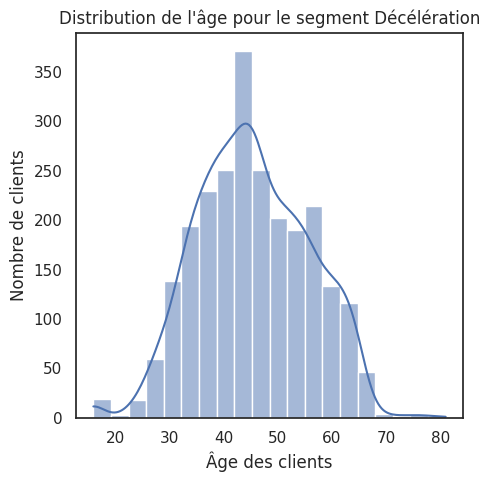

<ipython-input-40-8d26501e083a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=segment_analysis["SEXE"], palette="viridis")


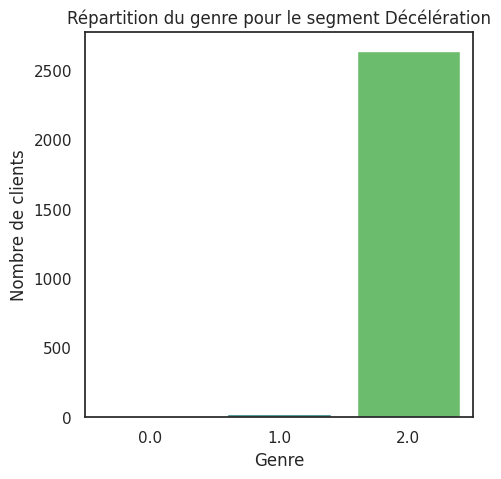

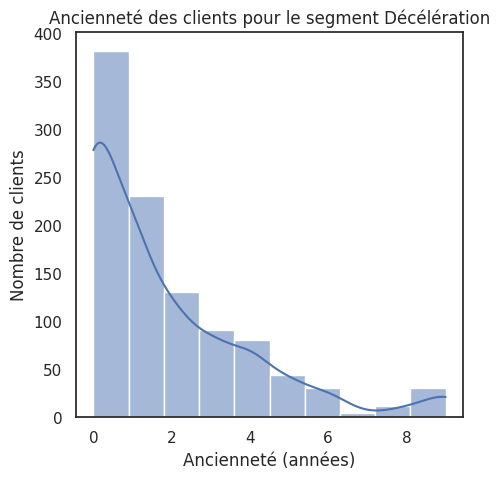

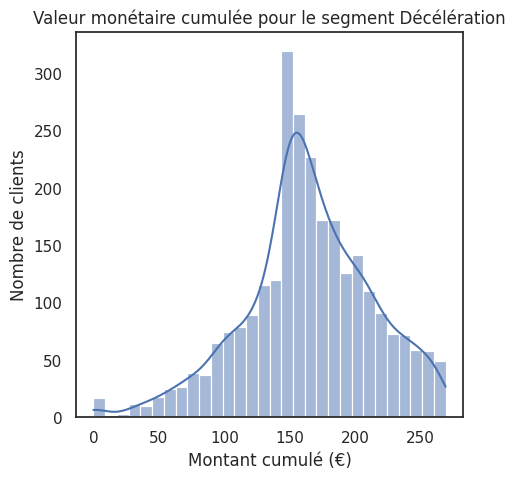

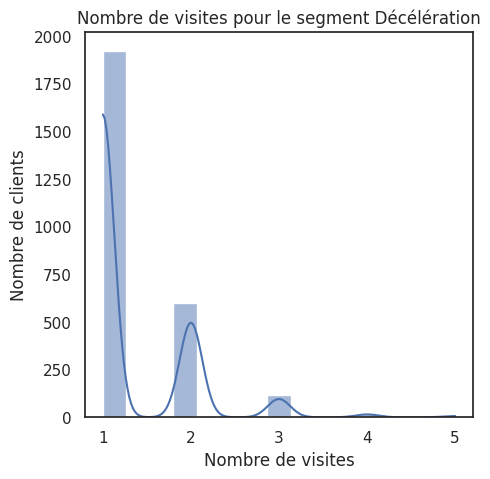

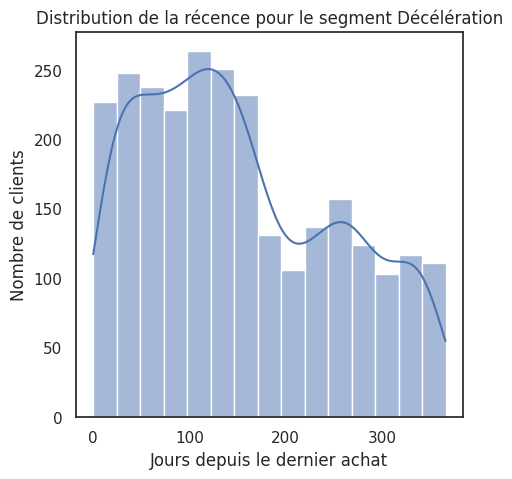

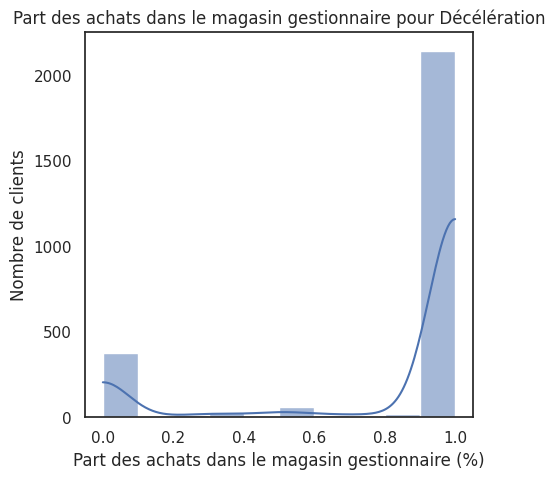

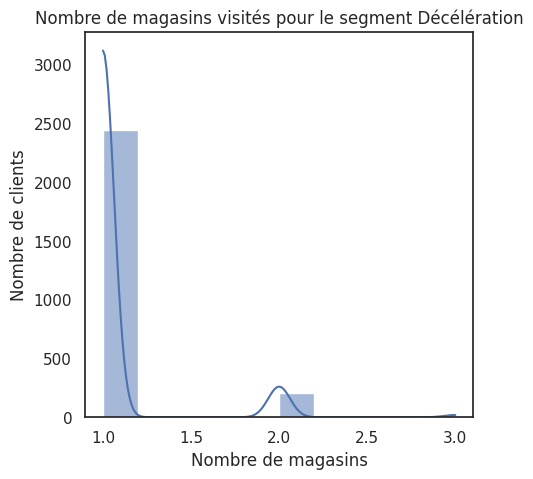

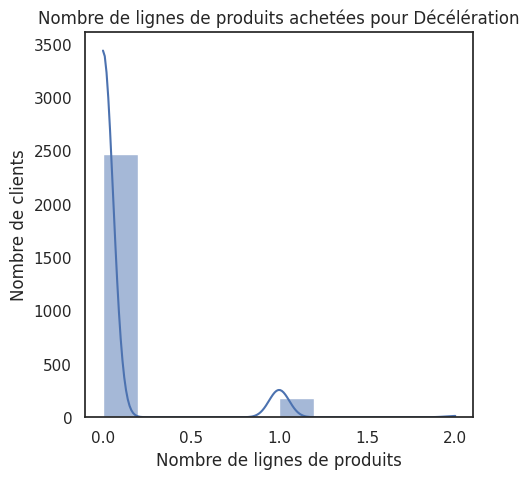

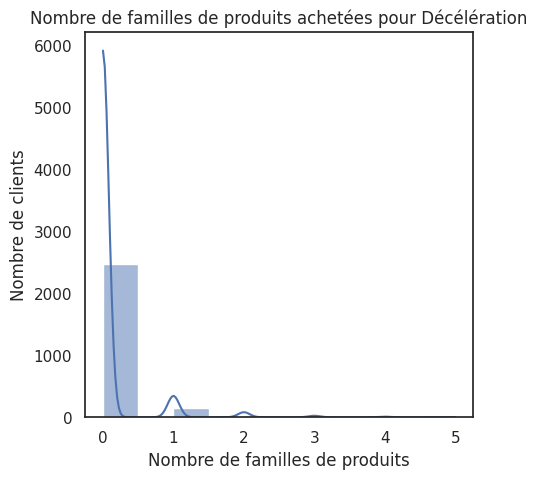

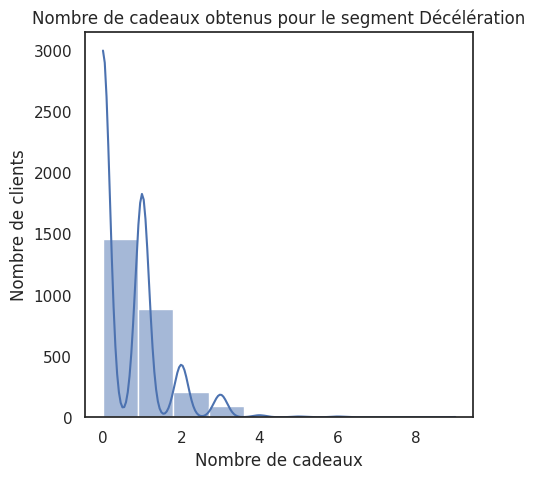

In [ ]:
# ✅ Sélectionner les colonnes pertinentes pour l'analyse
rfm_analysis = rfm_analysis[[
    "ID_INDIVIDU", "RFM_Category", "AGE", "SEXE", "ANCIENNETE", "CUMUL_VALUE",
    "AVG_VISIT_VALUE", "NB_VISITS", "RECENCY", "MANAGING_STORE", "MANAGING_STORE_SHARE",
    "NB_STORES", "NB_FAMILLES", "NB_LIGNES", "NB_GIFTS"
]]

# ✅ Définir le segment à analyser (ex : "Très bons clients")
segment_to_analyze = "Décélération"
segment_analysis = rfm_analysis[rfm_analysis["RFM_Category"] == segment_to_analyze]

# ✅ Afficher un aperçu des données pour le segment choisi
# import ace_tools as tools
# tools.display_dataframe_to_user(name=f"Analyse du segment : {segment_to_analyze}", dataframe=segment_analysis)

# ✅ Affichage des statistiques descriptives pour le segment sélectionné
print(segment_analysis.describe())

# ✅ Visualiser la répartition de l'âge des clients dans ce segment
plt.figure(figsize=(5, 5))
sns.histplot(segment_analysis["AGE"], bins=20, kde=True)
plt.title(f"Distribution de l'âge pour le segment {segment_to_analyze}")
plt.xlabel("Âge des clients")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Répartition par genre dans ce segment
plt.figure(figsize=(5, 5))
sns.countplot(x=segment_analysis["SEXE"], palette="viridis")
plt.title(f"Répartition du genre pour le segment {segment_to_analyze}")
plt.xlabel("Genre")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Répartition de l'ancienneté des clients
plt.figure(figsize=(5, 5))
sns.histplot(segment_analysis["ANCIENNETE"], bins=10, kde=True)
plt.title(f"Ancienneté des clients pour le segment {segment_to_analyze}")
plt.xlabel("Ancienneté (années)")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Valeur monétaire cumulée par client
plt.figure(figsize=(5, 5))
sns.histplot(segment_analysis["CUMUL_VALUE"], bins=30, kde=True)
plt.title(f"Valeur monétaire cumulée pour le segment {segment_to_analyze}")
plt.xlabel("Montant cumulé (€)")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Nombre de visites par client
plt.figure(figsize=(5, 5))
sns.histplot(segment_analysis["NB_VISITS"], bins=15, kde=True)
plt.title(f"Nombre de visites pour le segment {segment_to_analyze}")
plt.xlabel("Nombre de visites")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Répartition de la récence
plt.figure(figsize=(5, 5))
sns.histplot(segment_analysis["RECENCY"], bins=15, kde=True)
plt.title(f"Distribution de la récence pour le segment {segment_to_analyze}")
plt.xlabel("Jours depuis le dernier achat")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Part des achats dans le magasin gestionnaire
plt.figure(figsize=(5, 5))
sns.histplot(segment_analysis["MANAGING_STORE_SHARE"], bins=10, kde=True)
plt.title(f"Part des achats dans le magasin gestionnaire pour {segment_to_analyze}")
plt.xlabel("Part des achats dans le magasin gestionnaire (%)")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Nombre de magasins visités
plt.figure(figsize=(5, 5))
sns.histplot(segment_analysis["NB_STORES"], bins=10, kde=True)
plt.title(f"Nombre de magasins visités pour le segment {segment_to_analyze}")
plt.xlabel("Nombre de magasins")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Nombre de lignes de produits achetées
plt.figure(figsize=(5, 5))
sns.histplot(segment_analysis["NB_LIGNES"], bins=10, kde=True)
plt.title(f"Nombre de lignes de produits achetées pour {segment_to_analyze}")
plt.xlabel("Nombre de lignes de produits")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Nombre de familles de produits achetées
plt.figure(figsize=(5, 5))
sns.histplot(segment_analysis["NB_FAMILLES"], bins=10, kde=True)
plt.title(f"Nombre de familles de produits achetées pour {segment_to_analyze}")
plt.xlabel("Nombre de familles de produits")
plt.ylabel("Nombre de clients")
plt.show()

# ✅ Nombre de cadeaux obtenus
plt.figure(figsize=(5, 5))
sns.histplot(segment_analysis["NB_GIFTS"], bins=10, kde=True)
plt.title(f"Nombre de cadeaux obtenus pour le segment {segment_to_analyze}")
plt.xlabel("Nombre de cadeaux")
plt.ylabel("Nombre de clients")
plt.show()

# Partie 5 : Kmeans

In [ ]:
# RFM analysis by K-Means clustering
segment_analysis

,ID_INDIVIDU,RFM_Category,AGE,SEXE,ANCIENNETE,CUMUL_VALUE,AVG_VISIT_VALUE,NB_VISITS,RECENCY,MANAGING_STORE,MANAGING_STORE_SHARE,NB_STORES,NB_FAMILLES,NB_LIGNES,NB_GIFTS
7,1579,Décélération,46.0,2.0,NaN,193,193.0,1,170,942.0,0.0,1.0,0.0,0.0,1.0
9,1753,Décélération,51.0,2.0,8.0,146,146.0,1,146,771.0,1.0,1.0,0.0,0.0,1.0
12,2110,Décélération,55.0,2.0,NaN,173,173.0,1,175,470.0,1.0,1.0,0.0,0.0,0.0
15,2814,Décélération,43.0,2.0,8.0,88,44.0,2,65,942.0,0.0,2.0,0.0,0.0,0.0
22,4277,Décélération,55.0,2.0,NaN,159,159.0,1,185,942.0,1.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12451,240174,Décélération,45.0,2.0,NaN,154,154.0,1,0,757.0,1.0,1.0,0.0,0.0,2.0
12452,240178,Décélération,61.0,2.0,NaN,265,265.0,1,0,62.0,1.0,1.0,1.0,1.0,2.0
12454,240205,Décélération,NaN,2.0,NaN,162,162.0,1,0,871.0,1.0,1.0,1.0,1.0,0.0
12457,240269,Décélération,26.0,2.0,NaN,245,245.0,1,0,642.0,1.0,1.0,1.0,1.0,1.0


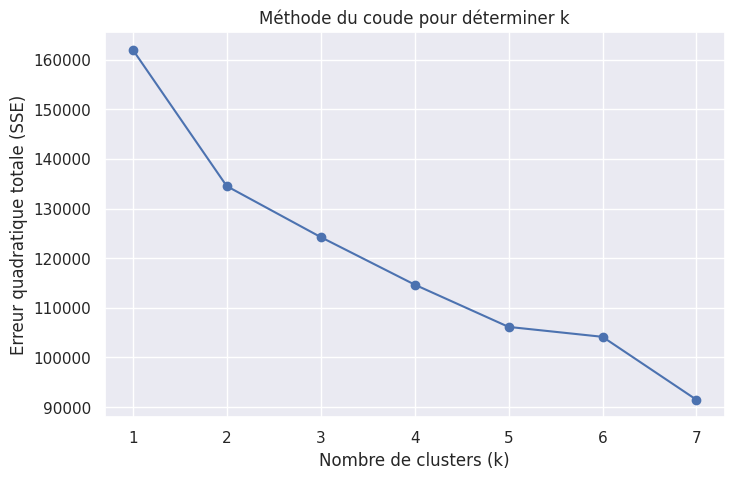

In [ ]:
# k-means clustering: using recency, frequency, and monetary as clustering varaibles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# step 1: standardize data
rfm_analysis_kmeans = rfm_analysis.drop(columns=['ID_INDIVIDU', 'RFM_Category'])
rfm_analysis_kmeans = rfm_analysis_kmeans.fillna(0)
X = StandardScaler().fit_transform(rfm_analysis_kmeans)

# step 2: find the optimal number of clusters
SSE=[]
for i in range(1,8,1):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
sns.set()
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), SSE, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Erreur quadratique totale (SSE)')
plt.title("Méthode du coude pour déterminer k")
plt.show()

In [ ]:
rfm_analysis

,ID_INDIVIDU,RFM_Category,AGE,SEXE,ANCIENNETE,CUMUL_VALUE,AVG_VISIT_VALUE,NB_VISITS,RECENCY,MANAGING_STORE,MANAGING_STORE_SHARE,NB_STORES,NB_FAMILLES,NB_LIGNES,NB_GIFTS
0,4,Très bons clients,NaN,0.0,NaN,475,79.166667,6,39,751.0,0.0,4.0,0.0,0.0,1.0
1,91,Clients faibles,62.0,2.0,NaN,112,112.000000,1,143,312.0,1.0,1.0,0.0,0.0,0.0
2,99,Bons clients,46.0,2.0,9.0,177,59.000000,3,95,312.0,0.0,1.0,0.0,0.0,0.0
3,557,Très bons clients,57.0,2.0,NaN,272,45.333333,6,65,753.0,1.0,1.0,0.0,0.0,3.0
4,1396,Très bons clients,43.0,2.0,NaN,876,109.500000,8,60,920.0,0.0,4.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12455,240219,Clients faibles,47.0,2.0,NaN,138,138.000000,1,0,642.0,1.0,1.0,0.0,0.0,1.0
12456,240221,Clients faibles,27.0,2.0,NaN,142,142.000000,1,0,642.0,1.0,1.0,0.0,0.0,1.0
12457,240269,Décélération,26.0,2.0,NaN,245,245.000000,1,0,642.0,1.0,1.0,1.0,1.0,1.0
12458,240290,Clients faibles,41.0,2.0,NaN,81,81.000000,1,0,491.0,1.0,1.0,0.0,0.0,1.0


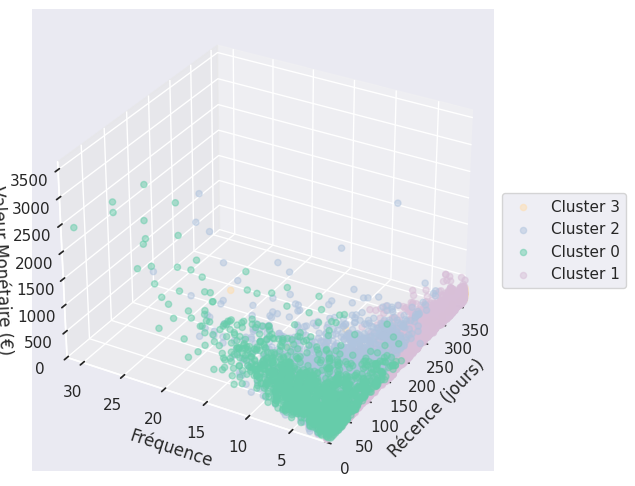

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Step 3: group customers into 4 clusters
random.seed(8)
km = KMeans(n_clusters=4, random_state=0)
km.fit(X)
random.seed(8)
pred = km.predict(X)
rfm_analysis = rfm_analysis.assign(clusters=pred)

# Step 4: visualize the 4 clusters

# Step 4_1: data preparation
R = []
F = []
M = []
mycolors = ['navajowhite', 'lightsteelblue', 'mediumaquamarine', 'thistle']
cluster_orders = [3, 2, 0, 1]

for i in cluster_orders:
    R.append(rfm_analysis.loc[rfm_analysis.clusters == i, 'RECENCY'].values.tolist())
    F.append(rfm_analysis.loc[rfm_analysis.clusters == i, 'NB_VISITS'].values.tolist())
    M.append(rfm_analysis.loc[rfm_analysis.clusters == i, 'CUMUL_VALUE'].values.tolist())

# Étape 4_2 : Graphique en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')  # ✅ Création correcte de l'axe 3D

for i in range(4):
    ax.scatter(R[i], F[i], M[i], c=mycolors[i], marker='o', alpha=0.5, label=f'Cluster {cluster_orders[i]}')

# ✅ Étiquettes des axes
ax.set_xlabel('Récence (jours)')
ax.set_ylabel('Fréquence')
ax.set_zlabel('Valeur Monétaire (€)')

# ✅ Ajustement automatique des axes
ax.set_xlim([min(rfm_analysis["RECENCY"]), max(rfm_analysis["RECENCY"])])
ax.set_ylim([min(rfm_analysis["NB_VISITS"]), max(rfm_analysis["NB_VISITS"])])
ax.set_zlim([min(rfm_analysis["CUMUL_VALUE"]), max(rfm_analysis["CUMUL_VALUE"])])

# ✅ Définir l'angle de vue (élévation=30°, azimut=120°)
ax.view_init(elev=30, azim=210)

# ✅ Affichage de la légende
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ Affichage du graphique 3D
plt.show()


In [ ]:
rfm_analysis.groupby("clusters").agg(
    Recency=("RECENCY", "median"),
    Frequency=("NB_VISITS", "median"),
    Monetary=("CUMUL_VALUE", "sum"),
    Size=("clusters", "count")
)


,Recency,Frequency,Monetary,Size
clusters,,,,
0,35.0,4.0,706814,1497
1,142.0,1.0,1437124,8246
2,64.0,4.0,1106579,2600
3,140.0,1.0,30611,117


<ipython-input-46-2decfb96db5a>:12: FutureWarning: The provided callable <function median at 0x78deb8fab1a0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_RFM3=rfm_analysis.groupby('segments').agg(Recency=('RECENCY',np.median),Frequency=('NB_VISITS',np.median),MonetarySum=('CUMUL_VALUE',np.sum),size=("clusters",'size'))
<ipython-input-46-2decfb96db5a>:12: FutureWarning: The provided callable <function median at 0x78deb8fab1a0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_RFM3=rfm_analysis.groupby('segments').agg(Recency=('RECENCY',np.median),Frequency=('NB_VISITS',np.median),MonetarySum=('CUMUL_VALUE',np.sum),size=("clusters",'size'))
<ipython-input-46-2decfb96db5a>:12: FutureWarning: The provided callable <function sum

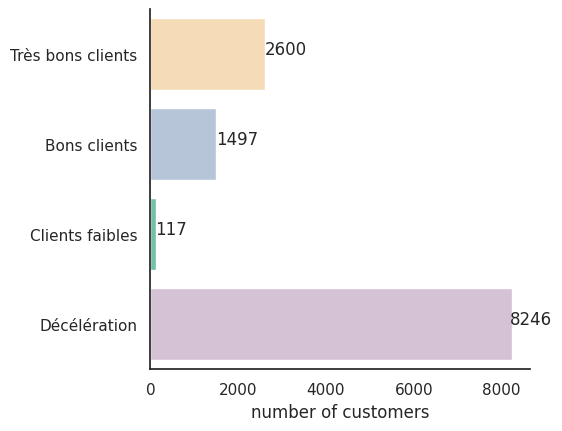

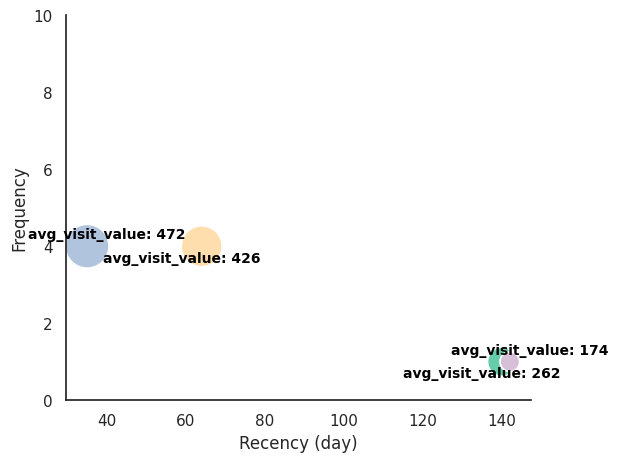

In [ ]:
# replace k-means cluster names with more meaningful names
d1 = {
    0: "Bons clients",         # 近期购买，频率较高，属于"良好客户"
    1: "Décélération",         # 购买频率低，回溯期高，客户数量多，可能是"衰退客户"
    2: "Très bons clients",    # 购买频率高，价值高，是"非常好的客户"
    3: "Clients faibles"       # 购买频率低，回溯期高，可能是"流失客户"
}

rfm_analysis.loc[:,"segments"]=rfm_analysis.loc[:,"clusters"].map(d1)
# calculate the number of customers, median recency, median frequency,
# and average customer spend in each customer segment
df_RFM3=rfm_analysis.groupby('segments').agg(Recency=('RECENCY',np.median),Frequency=('NB_VISITS',np.median),MonetarySum=('CUMUL_VALUE',np.sum),size=("clusters",'size'))
df_RFM3.loc[:,'Sales/Customer']=round(df_RFM3.loc[:,'MonetarySum']/df_RFM3.loc[:,'size'])
df_RFM3=df_RFM3.astype({'Sales/Customer':int}).reset_index()

# visualize
plt.figure(figsize=(10,4))
seg_names=['Très bons clients','Bons clients','Clients faibles','Décélération']

# plot the number of customers in each segment
sns.set_style("white")
plt.axes([0, 0, 0.38, 0.9])
seg=rfm_analysis.groupby('segments').size().to_frame().rename(columns={0:'number of customers'}).reset_index()
sns.barplot(x='number of customers',y='segments',data=seg,order=seg_names,palette=mycolors)
for i in [0,1,2,3]:
    number=int(seg.loc[seg.segments==seg_names[i],'number of customers'])
    x_pos=round(number,-2)
    plt.text(x_pos,i,number)
plt.ylabel("")
sns.despine()

# 绘制气泡图
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='Recency',
    y='Frequency',
    hue='segments',
    hue_order=seg_names,
    palette=mycolors,
    size='Sales/Customer',
    sizes=(200,1000),
    legend=False,
    data=df_RFM3
)

# 在每个气泡上显示 AVG_VISIT_VALUE，并调整文本位置
for i in range(len(df_RFM3)):
    recency = df_RFM3.loc[i, 'Recency']
    frequency = df_RFM3.loc[i, 'Frequency']
    avg_visit_value = round(df_RFM3.loc[i, 'Sales/Customer'])  # 取整方便显示

    # 适当调整文本的位置，防止重叠
    x_offset = 5 if i % 2 == 0 else -5  # 偶数向右偏，奇数向左偏
    y_offset = 0.3 if i % 2 == 0 else -0.3  # 偶数向上偏，奇数向下偏

    plt.text(
        recency + x_offset, frequency + y_offset,
        f"avg_visit_value: {avg_visit_value}",  # 格式化文本
        fontsize=10, ha='center', va='center',
        color='black', fontweight='bold'
    )

# 设置轴标签
plt.xlabel('Recency (day)')
plt.ylabel('Frequency')
plt.ylim(0, 10)

sns.despine()
plt.show()


In [ ]:
# 创建字典存储每个 cluster 下的 ID_INDIVIDU
cluster_dict = {cluster: rfm_analysis[rfm_analysis["clusters"] == cluster]["ID_INDIVIDU"].tolist()
                for cluster in sorted(rfm_analysis["clusters"].unique())}
print(f"Cluster 0 has {len(cluster_dict[0])} customers")
print(cluster_dict[0][:10])  # 仅显示前 10 个
print(f"Cluster 1 has {len(cluster_dict[1])} customers")
print(cluster_dict[1][:10])  # 仅显示前 10 个
print(f"Cluster 2 has {len(cluster_dict[2])} customers")
print(cluster_dict[2][:10])  # 仅显示前 10 个
print(f"Cluster 3 has {len(cluster_dict[3])} customers")
print(cluster_dict[3][:10])  # 仅显示前 10 个

Cluster 0 has 1497 customers
['1396', '1534', '5458', '6071', '6195', '6904', '7776', '8967', '9496', '9852']
Cluster 1 has 8246 customers
['91', '99', '1579', '1611', '1753', '1943', '2110', '2142', '2976', '3140']
Cluster 2 has 2600 customers
['557', '1433', '2096', '2814', '2886', '3547', '4254', '4451', '4747', '5296']
Cluster 3 has 117 customers
['4', '2207', '11787', '85681', '87444', '88018', '90356', '90994', '96788', '101658']


In [ ]:
pd.crosstab(rfm_analysis["RFM_Category"], rfm_analysis["clusters"])
# Ce tableau représente la correspondance entre les segments RFM et les clusters issus du K-Means.

# Ligne "Bons clients" : Majoritairement dans le cluster 1 (1636 clients), suivi du cluster 2 (603).
# Ligne "Clients faibles" : Principalement regroupés dans le cluster 1 (3295).
# Ligne "Décélération" : Majoritairement dans le cluster 1 (2296).
# Ligne "Très bons clients" : Répartis entre les clusters 0 (932), 1 (1019) et 2 (1843).
# 📌 Interprétation :
# Le clustering K-Means ne suit pas exactement la segmentation RFM, mais on observe une forte correspondance entre certains segments et des clusters spécifiques.

clusters,0,1,2,3
RFM_Category,,,,
Bons clients,252,1636,603,24
Clients faibles,116,3295,2,37
Décélération,193,2296,152,26
Petits clients,4,0,0,0
Très bons clients,932,1019,1843,30
